In [1]:
import numpy as np
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt

# Preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# ML functions
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('data/Absenteeism_at_work_AAA/Absenteeism_at_work.csv',
                   header=0,delimiter=";")
print("Size of the data: ", data.shape)

Size of the data:  (740, 21)


In [3]:
# Convert the pandas to numpy
data = np.array(data)
data_X = data[:,:-1]
data_Y = data[:,-1]
n_feature = data_X.shape[1]
print("number of features: ", n_feature)

# Generate Train/Test data
X_train, X_test, y_train, y_test = train_test_split(
       data_X, data_Y, test_size=0.33, random_state=0)

number of features:  20


In [4]:
# Let's do some normalization
scaler = preprocessing.StandardScaler().fit(X_train)
# The same scaling 'object' applied to both train/test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Let's add some noise
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [6]:
# Prepare the data
k_nn = 20
np.random.seed(0)
# number of noisy features we add to the original features
k_noise_list = [2, 20, 200, 500, 3000, 6000]
train_X_list = []
test_X_list = []
for k in k_noise_list:
    # add noisy columns to train data
    X_train_noise = np.random.normal(0,1,[n_train,k])
    X_train_new = np.concatenate((X_train, X_train_noise), axis=1)
    train_X_list.append(X_train_new)

    # add noisy columns to test data
    X_test_noise = np.random.normal(0,1,[n_test,k])
    X_test_new = np.concatenate((X_test, X_test_noise), axis=1)
    test_X_list.append(X_test_new)

In [7]:
# train the kNN
err_list_train = np.zeros([len(k_noise_list)])
err_list_test = np.zeros([len(k_noise_list)])
for i in range(len(k_noise_list)):
    X_train_tmp = train_X_list[i]
    X_test_tmp = test_X_list[i]
    k_nn_model = KNeighborsRegressor(n_neighbors=k_nn)
    k_nn_model.fit(X_train_tmp, y_train)
    err_list_train[i] = np.mean((k_nn_model.predict(X_train_tmp)-y_train)**2)
    err_list_test[i] = np.mean((k_nn_model.predict(X_test_tmp)-y_test)**2)

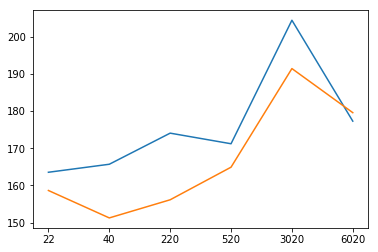

In [8]:
# Plot the error: importance of doing normalization
fig = plt.figure()
plt.plot(err_list_train)
plt.plot(err_list_test)
n_feat_list = [x+n_feature for x in k_noise_list]
plt.xticks(list(range(len(k_noise_list))), n_feat_list)
plt.show()

In [9]:
# As a benchmark
np.var(y_test)

163.02640566430654

In [10]:
# Visualize the distance 
dist_mat = np.zeros([len(n_feat_list), n_train])
 
# Compute the distance from original point to each point in the training data
for i in range(len(n_feat_list)):
    X_train_tmp = train_X_list[i]
    test_point = np.zeros([n_feat_list[i]])
    for j in range(n_train):
        dist_mat[i, j] = np.sum((X_train_tmp[j,:]-test_point)**2)

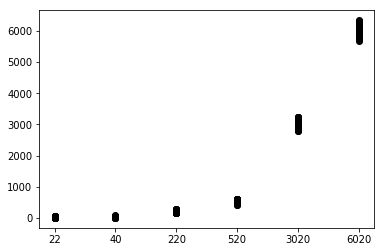

In [11]:
# Plot the error: importance of doing normalization
fig = plt.figure()
for i in range(len(n_feat_list)):
    plt.plot(i*np.ones([n_train]), dist_mat[i,:], 'o', color='black')
plt.xticks(list(range(len(n_feat_list))), n_feat_list)
plt.show()